In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


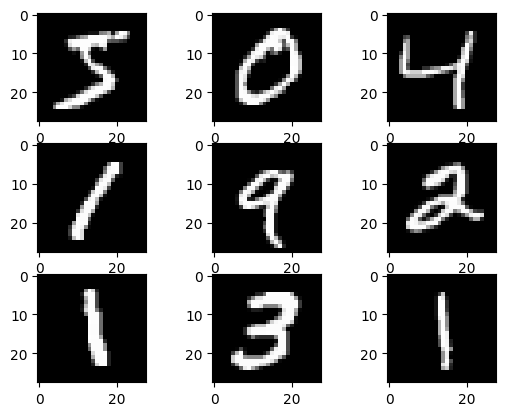

In [ ]:
from matplotlib import pyplot
for i in range(9):
 pyplot.subplot(330 + 1 + i)
 pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
x_train = x_train[:5000]
y_train = y_train[:5000]

x_test = x_test[:5000]
y_test = y_test[:5000]

x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:

print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))

print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (5000, 784)
Y_train: (5000, 10)
X_test:  (5000, 784)
Y_test:  (5000, 10)


In [ ]:
def random_weights(input_size, hidden_size, output_size):
    weight_hidden = np.random.randn(hidden_size, input_size)
    bais_hidden = 1

    weight_output = np.random.randn(output_size, hidden_size)
    bais_output = 1

    return weight_hidden,  bais_hidden, weight_output, bais_output

In [ ]:
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))



In [ ]:
def forward(input_list, weight_hidden, bais_hidden, weight_output, bais_output):
    inputs = np.array(input_list).T

    hidden_inputs = np.dot(weight_hidden, inputs) + bais_hidden
    hidden_outputs = sigmoid(hidden_inputs)

    out_inputs = np.dot(weight_output, hidden_outputs) + bais_output


    oj = sigmoid(out_inputs)

    return oj

In [ ]:
def derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
def backward(inputs_list, targets_list, weight_hidden,  bais_hidden,weight_output, bais_output, eta):
    inputs = np.array(inputs_list).T
    tj = np.array(targets_list).T
    hidden_inputs = np.dot(weight_hidden, inputs) + bais_hidden
    hidden_outputs = sigmoid(hidden_inputs)
    out_inputs = np.dot(weight_output, hidden_outputs) + bais_output
    oj = sigmoid(out_inputs)

    # Backward
    output_errors = -(tj - oj)
    hidden_errors = np.dot(weight_output.T, output_errors)

    # Update weights and biases
    weight_output -= eta * np.dot((output_errors * derivative(oj)), hidden_outputs.T)
    weight_hidden -= eta * np.dot((hidden_errors * derivative(hidden_outputs)), inputs.T)
    bais_output -= eta* (output_errors *derivative(oj))
    bais_hidden -= eta* (hidden_errors * derivative(hidden_outputs))


    return weight_hidden,  bais_hidden, weight_output, bais_output

In [ ]:
def fit(inputs_list, targets_list, epochs, weight_hidden, bais_hidden,weight_output, bais_output,eta):
    for epoch in range(epochs):
        weight_hidden, bais_hidden,  weight_output, bais_output = backward(inputs_list, targets_list,weight_hidden , bais_hidden, weight_output, bais_output,eta)
        print(f"Epoch {epoch}/{epochs} completed.")
    return weight_hidden, bais_hidden,  weight_output, bais_output


In [ ]:
def predict(X, weight_hidden, bais_hidden,  weight_output, bais_output):
    outputs = forward(X, weight_hidden, bais_hidden,  weight_output, bais_output).T
    return outputs

In [ ]:
#  architecture
input_size = 784
hidden_size = 128
output_size = 10
eta = 0.1
epochs = 100

In [ ]:
weight_hidden,  bais_hidden, weight_output, bais_output = random_weights(input_size, hidden_size, output_size)

weight_hidden,  bais_hidden, weight_output, bais_output = fit(x_train, y_train, epochs,weight_hidden,  bais_hidden, weight_output, bais_output , eta)

Epoch 0/100 completed.
Epoch 1/100 completed.
Epoch 2/100 completed.
Epoch 3/100 completed.
Epoch 4/100 completed.
Epoch 5/100 completed.
Epoch 6/100 completed.
Epoch 7/100 completed.
Epoch 8/100 completed.
Epoch 9/100 completed.
Epoch 10/100 completed.
Epoch 11/100 completed.
Epoch 12/100 completed.
Epoch 13/100 completed.
Epoch 14/100 completed.
Epoch 15/100 completed.
Epoch 16/100 completed.
Epoch 17/100 completed.
Epoch 18/100 completed.
Epoch 19/100 completed.
Epoch 20/100 completed.
Epoch 21/100 completed.
Epoch 22/100 completed.
Epoch 23/100 completed.
Epoch 24/100 completed.
Epoch 25/100 completed.
Epoch 26/100 completed.
Epoch 27/100 completed.
Epoch 28/100 completed.
Epoch 29/100 completed.
Epoch 30/100 completed.
Epoch 31/100 completed.
Epoch 32/100 completed.
Epoch 33/100 completed.
Epoch 34/100 completed.
Epoch 35/100 completed.
Epoch 36/100 completed.
Epoch 37/100 completed.
Epoch 38/100 completed.
Epoch 39/100 completed.
Epoch 40/100 completed.
Epoch 41/100 completed.
Ep

In [ ]:
test = predict(x_test, weight_hidden,  bais_hidden, weight_output, bais_output)
y_pred = []

for i in test:
    max_idx = np.argmax(i)
    prediction= np.zeros_like(i)
    prediction[max_idx] = 1
    y_pred.append(prediction)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
print("The Accuracy:",accuracy_score(y_pred, y_test))

The Accuracy: 0.7794


In [ ]:
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

conf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf)

Confusion Matrix:
[[43897  1103]
 [ 1103  3897]]
